# Problem to solve

The objective is to use the data from handwritings to create a model that allows to predict if some of those handwritings came from a bipolar person or not.

The data include the target label, which makes it a supervised machine learning task.

In this part we implement a bivariate analysis between numeric columns and also categories 

In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import plotly.express as px
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =  pd.read_parquet('../data/processed/data_processed.parquet')

In [4]:
data.head(5)

,VHD,VLV,V(mC),V(E),V(Sx),V(L),Men,Femal,"Age(0,0.5,1)","Label(0,1)"
0,0.000050,37807.614,8.14400,0.005491,8.122097,245.843,1,0,0.0,0
1,0.000005,29080.230,3.52250,0.000950,0.251000,173.653,1,0,0.0,0
2,0.000007,25078.010,4.39170,0.000735,1.530600,287.208,1,0,0.0,0
3,0.000228,15006.147,14.23750,0.018335,1.293500,407.500,0,1,0.5,0
4,0.000003,31193.673,2.06974,0.000550,1.112700,460.944,0,1,0.5,0


In [5]:
numeric_keys = ['VHD', 'VLV', 'V(mC)', 'V(E)', 'V(L)']

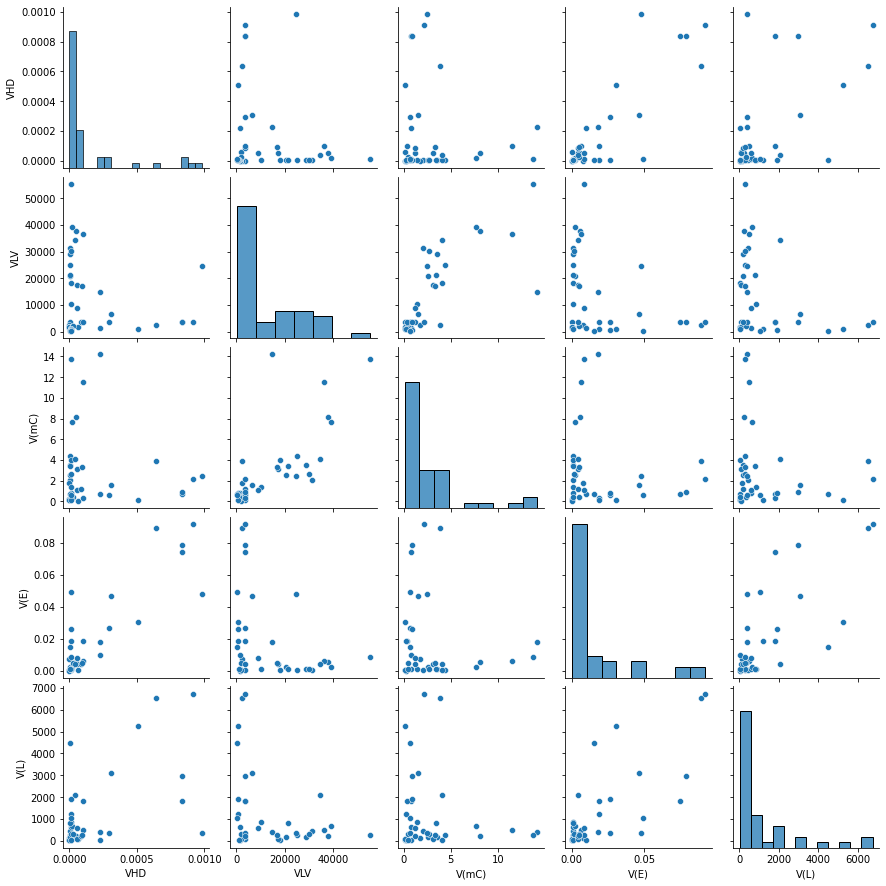

In [6]:
sns.pairplot(data[numeric_keys])


In [7]:
title = 'V(L) vs V(E)'
px.scatter(data, x='V(L)', y='V(E)', title=title)


In [8]:
title = 'V(mC) vs VLV'
px.scatter(data, x='V(mC)', y='VLV', title=title)


In [10]:
two_way_table_1 = data.groupby(['Men', 'Femal'], as_index=False)
two_way_table_1.size()

,Men,Femal,size
0,0,1,22
1,1,0,20


In [11]:
two_way_table_1 = data.groupby(['Men', 'Label(0,1)'], as_index=False)
two_way_table_1.size()

,Men,"Label(0,1)",size
0,0,0,16
1,0,1,6
2,1,0,12
3,1,1,8


In [12]:
two_way_table_1 = data.groupby(['Femal', 'Label(0,1)'], as_index=False)
two_way_table_1.size()

,Femal,"Label(0,1)",size
0,0,0,12
1,0,1,8
2,1,0,16
3,1,1,6


In [13]:
two_way_table_1 = data.groupby(['Age(0,0.5,1)', 'Label(0,1)'], as_index=False)
two_way_table_1.size()

,"Age(0,0.5,1)","Label(0,1)",size
0,0.0,0,5
1,0.5,0,10
2,0.5,1,10
3,1.0,0,13
4,1.0,1,4
